# Machine Learning for Sepsis Pathway 

Setup Libraries and plotting defaults. 

In [1]:
import sys
import os
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
#import statsmodels.formula.api as smf
#from statsmodels.stats.anova import anova_lm


import re
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from pandasql import sqldf
import sqlalchemy
import pyodbc

import dfply as dfp
from dfply import *

import datetime
from datetime import *

import pyodbc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import sklearn

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

import forestci as fci

from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant
import xgboost as xgb
from imblearn.over_sampling import SMOTENC
n_est=55

from hyperopt.pyll import scope
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

pd.set_option('display.max_columns', None)


import Utilities
import importlib
importlib.reload(Utilities)

import MLUtilities
importlib.reload(MLUtilities)

from matplotlib.colors import to_rgba

plt.style.use('./CEIH.mplstyle')
color_dict = {0: to_rgba('#32C0D2', 1),
                1: to_rgba("#E0B165", 1),}

cmap_blended = sns.blend_palette(["#ADE6ED","#70D3E0","#32C0D2","#289AA8","#307078"], as_cmap=True)


import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx
    
OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
               'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
             'FirstGCSScoreAdult':'Glasgow Coma Scale',
               'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
               'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
               'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':'O2 Saturation (%)',  'Gender_Male':'Sex - Male',
               'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
               'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
               'FirstO2Flow':'O2 Flow '
               }


plotSettings = {
        #  ( bins, xmin, xmax, log/linear)
        'AGEONADMISSION':(50,20,110,'linear','Age (y)', False, 0,0),
        
        
        'FirstBloodGlucose':(50,0,100,'log','Blood Glucose [mmol/L]', False,0, 0),
        'FirstTemperatureDegreesC':(50,30,45,'log', r"Temperature [$^\circ$C]", True,35.5,38.1),
                'FirstWeightKg':(50,50,150,'log','Weight [kg]', False, 0,0),

        
        'FirstPainAssessment': (11,-0.5,10.5,'log','Pain Assessment', False, 0,0),
        'FirstBPSystolic': (50,50,250,'log', 'BP Systolic [mm Hg]',True, 100,170 ),
        'FirstBPDiastolic': (50,0,200,'log', 'BP Diastolic [mm Hg]', False,0,0),
        'FirstEstimatedGlomerularFiltrationRate': (50,0,100,'log',r"Estimated Glomerular Filtration Rate [mL/min/1.73m$^{2}$]", True, 60, 100),
        'FirstCreatinine': (50,0,800,'log',r"Creatinine - Serum [$\mu$mol/L]", True, 45, 110),
        'FirstAlbumin': (60,0,60,'log','Albumin  Level [g/L]', True, 30, 48),
        'FirstTotalBilirubin': (60,0,100,'log',r"Total Bilirubin Level [$\mu$mol/L]", True, 2, 24 ),
        'FirstAlkalinePhosphatase': (60,0,800,'log','Alkaline Phosphatase Level [U/L]',True, 30,110),
        'FirstAlanineAminotransferase': (60,0,700,'log','Alanine Aminotransferase Level [U/L]', True,0,55),
        'FirstAspartateAminotransferase': (60,0,700,'log','Aspartate Aminotransferase Level [U/L]', True, 0,45),
        'FirstGammaGlutamylTransferase': (60,0,700,'log','Gamma Glutamyl Transferase Level [U/L]', True, 0, 60),
        'FirstLactateDehydrogenase': (60,0,1200,'log','Lactate Dehydrogenase [U/L]', True, 120, 250),
        'FirstHaemoglobin': (50,10, 220,'log','Haemoglobin [g/L]', True, 115, 175),
        'FirstWhiteCellCount': (50,0, 50,'log',r"White Cell Count [$\times 10^{9}$/L]",True, 4,11),
        'FirstPlateletCount': (50,0, 1000,'log',r"Platelet Count [$\times 10^{9}$/L]",True,150,500),
        'FirstNeutrophils': (50,0, 50,'log',r"Absolute Neutrophil Count [$\times 10^{9}$/L]",True,1.80,7.50),
        'FirstDDimer': (40,0, 20,'log',r"D-Dimer [mg/L]",True,0,0.79),
        'FirstCreactiveprotein': (50,0, 600,'log',r"C-Reactive Protein [mg/L]",True, 0,8),
        'FirstTroponinT': (50,0, 600,'log',r"Troponin T Level [mg/L]",True,0,16),
        'FirstNTproBNP': (50,0, 40000,'log',r"NT-pro Brain Natriuretic Peptide [mg/L]",True,0,124),
        
        'FirstAnionGapVenous': (50,0, 50,'log',r"Anion Gap Venous [mmol/L]", True, 7, 17),
        'FirstAnionGapArterial': (50,0, 50,'log',r"Anion Gap Arterial [mmol/L]",  True, 7, 17),
        'FirstBaseExcessVenous': (50,-30, 30,'log',r"Base Excess Venous [mmol/L]", True, -3, 3),
        'FirstBaseExcessArterial': (50,-30, 30,'log',r"Base Excess Arterial [mmol/L]", True, -3, 3),
        'FirstBilirubinVenous': (60,0, 60,'log',r"Bilirubin Venous [$\mu$mol/L]", True, 2,24),
        'FirstBilirubinArterial': (60,0, 60,'log',r"Bilirubin Arterial [$\mu$mol/L]", True, 2,24),
        'FirstCarboxyhaemoglobinVenous': (50,0, 20,'log',r"Carboxyhaemoglobin Venous [%]", True, 0.3, 1.8),
        'FirstCarboxyhaemoglobinArterial': (50,0, 20,'log',r"Carboxyhaemoglobin Arterial [%]", True, 0.3, 1.8),
        'FirstChlorideDirectVenous': (50,50, 150,'log',r"Chloride Direct Venous [mmol/L]",False, 100,109),
        'FirstChlorideDirectArterial': (50,50, 150,'log',r"Chloride Direct Arterial [mmol/L]", True, 100,109),
        'FirstCreatinineVenous':(50,0,500,'log',r"Creatinine Venous [$\mu$mol/L]", True, 50, 120),
        'FirstCreatinineArterial':(50,0,500,'log',r"Creatinine Arterial [$\mu$mol/L]", True, 50,120),
        'FirstGlucoseVenous':(50,0,30,'log',r"Glucose  Venous [mmol/L]", False,0,0),
        'FirstGlucoseArterial':(50,0,30,'log',r"Glucose  Arterial [mmol/L]", True,2.6,5.6),
        'FirstIonised Calcium Venous':(50,0,2,'log',r"Ionised Calcium Venous [mmol/L]", True, 1.1, 1.3),
        'FirstIonised Calcium Arterial':(50,0,2,'log',r"Ionised Calcium Arterial [mmol/L]", True, 1.1, 1.3),
        'FirstLactateVenous':(50,0,30,'log',r"Lactate Venous [mmol/L]", True, 0.2, 2.0),
        'FirstLactateArterial':(50,0,30,'log',r"Lactate Arterial [mmol/L]", True, 0.2, 2.0),
        'FirstMethaemoglobinVenous': (20,0, 3,'log',r"Methaemoglobin Venous [%]", True, 0.4, 1.2),
        'FirstMethaemoglobinArterial': (20,0, 3,'log',r"Methaemoglobin Arterial [%]", True, 0.2,0.6),
        'FirstOxygenSaturationVenous': (50,0, 100,'log',r"Oxygen Saturation Venous [%]", False, 0,0),
        'FirstOxygenSaturationArterial': (50,0, 100,'log',r"Oxygen Saturation Arterial [%]", True,95, 99),
        'FirstOxyhaemoglobinVenous': (50,0, 100,'log',r"Oxyhaemoglobin Venous [%]", False, 0,0),
        'FirstOxyhaemoglobinArterial': (50,0, 100,'log',r"Oxyhaemoglobin Arterial [%]", False, 0,0),
        'FirstReducedHaemoglobinVenous': (50,0, 100,'log',r"Reduced Haemoglobin Venous [%]", False, 0,0),
        'FirstReducedHaemoglobinArterial': (50,0, 100,'log',r"Reduced Haemoglobin Arterial [%]", False, 0,0),
        'FirstTotalHaemoglobinVenous': (50,10, 220,'log','Total Haemoglobin Venous [g/L]', True, 115,180),
        'FirstTotalHaemoglobinArterial': (50,10, 220,'log','Total Haemoglobin Arterial [g/L]', True, 115,180), 
        'FirstpCO2Venous': (50,0,150,'log', 'pCO2 Venous [mm Hg]', True,41,51),
        'FirstpCO2Arterial': (50,0,150,'log', 'pCO2 Arterial [mm Hg]', True, 35, 45 ),
        'FirstpO2Venous': (50,0,200,'log', 'pO2 Venous [mm Hg]', True, 25,40),
        'FirstpO2Arterial': (50,0,200,'log', 'pO2 Arterial [mm Hg]', True,67, 108),
        'FirstpHVenous': (50,6.8,7.8,'log', 'pH Venous', True, 7.32,7.42),
        'FirstpHArterial': (50,6.8,7.8,'log', 'pH Arterial', True, 7.36, 7.44),
        'FirstPotassiumDirectVenous':(50,0,10,'log',r"Potassium Direct Venous [mmol/L]", False, 0,0),
        'FirstPotassiumDirectArterial':(50,0,10,'log',r"Potassium Direct Arterial [mmol/L]", True, 3.1, 4.2),
        'FirstSodiumDirectVenous':(50,100,180,'log',r"Sodium Direct Venous [mmol/L]", False, 0,0),
        'FirstSodiumDirectArterial':(50,100,180,'log',r"Sodium Direct Arterial [mmol/L]", True, 137, 145),}


Failed to import duecredit due to No module named 'duecredit'
c:\Users\ibertr02\venvs\ceihml\Lib\site-packages\snowflake\connector\options.py:103: UserWarning: You have an incompatible version of 'pyarrow' installed (15.0.2), please install a version that adheres to: 'pyarrow<10.1.0,>=10.0.1; extra == "pandas"'
  warn_incompatible_dep(
Failed to import ArrowResult. No Apache Arrow result set format can be used. ImportError: DLL load failed while importing arrow_iterator: The specified procedure could not be found.


# Settings for Machine Learning Model 

In [2]:
# Sepsis HeartFailure PE Pneumonia COPD UTI
# SepsisPneumonia
Diagnosis =   "Sepsis"
# Diagnosis = 'SepsisPneumonia'

DiagnosisString=Diagnosis+'Flag'

# DataSet1 All observations 
# DataSet2 Not including Oxygen Flow 

DataSet = 'DataSet30' 


# MLModel = 'randomforest'

print(Diagnosis,DiagnosisString)

Sepsis SepsisFlag


# Load Data Files 

In [3]:
start_date =  '2023-01-01'  #dates[Facility][0]
end_date   =  '2024-01-01' #dates[Facility][1]

select_start_date = '2023-01-01'

DataReasons = "Training"

In [4]:
Data_Storage_File = 'DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_{}_{}_{}_Stage_01.pkl'.format(start_date,end_date,DataReasons)
print(Data_Storage_File)


with open(Data_Storage_File, 'rb') as file:
    Emergency_IPInfo_Complete_Numeric = pd.read_pickle(file)


DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_2023-01-01_2024-01-01_Training_Stage_01.pkl


In [5]:
importlib.reload(MLUtilities)
Emergency_IPInfo_Complete_Numeric = MLUtilities.setNumeric(Emergency_IPInfo_Complete_Numeric)

In [6]:
Emergency_IPInfo_Complete_Numeric['IndiginousFlag'] = 0  # np.where((Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isna()|Emergency_IPInfo_Complete_Numeric.IndiginousStatus=='Not Aboriginal-TSI'),0,1)
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isin(['Aboriginal','Aboriginal and TSI', 'TSI']),'IndiginousFlag'] = 1

# Setup Machine Learning Information 

In [7]:

# DiagnosisString='SepsisFlag'

if Diagnosis == "SepsisPneumonia":
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.index)))
print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1]))


Diagnosis being investigated = SepsisFlag
Total Number of Cases = 320013
Number of SepsisFlag Cases  2761


In [8]:
df = Emergency_IPInfo_Complete_Numeric.copy()
df.name='{} diagnosis detected from full Diagnosis list, updated'.format(Diagnosis)
importlib.reload(MLUtilities)
df = MLUtilities.setDefaults(df)

In [9]:
AnalysisVariable =['FirstBPSystolic', 'FirstLevelofConsciousness',
       'FirstPulseRateBPM', 'FirstRespiration', 'FirstSpO2',
       'FirstTemperatureDegreesC',  #'FirstWeightKg', 'FirstUrinalysisBlood',
       # 'FirstUrinalysisLeukocytes', 
       #'FirstO2Flow',
       #'FirstGCSScoreAdult',
       DiagnosisString]

if DataSet == 'DataSet1':
       AnalysisVariable.append('FirstO2Flow')

if DataSet == 'DataSet30':
       AnalysisVariable.append('IndiginousStatus')

In [10]:
df_temp = df[AnalysisVariable].copy()
# df_temp[DiagnosisString] = df_temp[DiagnosisString].astype('category')
# df_temp['TriageCategory'] = df_temp['TriageCategory'].astype('category')
# df_temp['Gender'] = df_temp['Gender'].astype('category')
# df_temp['IndigenousStatusDescription'] = df_temp['IndigenousStatusDescription'].astype('category')                           
# df_temp['SoBFlag'] = df_temp['SoBFlag'].astype('category')
# df_temp.dropna(inplace=True)

In [11]:
df_temp[df_temp.isna().any(axis=1)]

,FirstBPSystolic,FirstLevelofConsciousness,FirstPulseRateBPM,FirstRespiration,FirstSpO2,FirstTemperatureDegreesC,SepsisFlag,IndiginousStatus
79935,137,0.0,110,18,100,37.1,0,None
232500,124,0.0,66,18,100,37.5,0,None
251122,107,0.0,85,14,100,36.6,0,None
317060,114,0.0,70,18,98,36.4,0,None
369328,137,0.0,75,18,99,36.2,0,None


In [12]:
y = df_temp[[DiagnosisString]]
X = df_temp[AnalysisVariable].drop(DiagnosisString, axis=1).copy()
x_vars = X.columns

## Only have numerical features in this model 

In [13]:
skew_vars = []

numeric_features = X.drop(skew_vars, axis=1).select_dtypes(
        include=['float64', 'int64']).columns

categorical_features = X.select_dtypes(
        include=['category', 'object']).columns

In [14]:
categorical_features,numeric_features

(Index(['IndiginousStatus'], dtype='object'),
 Index(['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM',
        'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC'],
       dtype='object'))

In [15]:
numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler()),  # StandardScaler #MinMaxScaler
        #('skew', FunctionTransformer(log_transform))
    ])

categorical_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))])  # OrdinalEncoder() #OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', numeric_transformer, numeric_features),
            ('categorical', categorical_transformer, categorical_features)
        ])

def pip_f(reg):
    pip = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    return(pip)

functions = {
        # 'decisiontree': DecisionTreeClassifier(class_weight='balanced', random_state=n_est),   #######class_weight='balanced' check this
        'randomforest': RandomForestClassifier(class_weight='balanced', random_state=n_est),
        # 'knn': KNeighborsClassifier(),
        # 'xgboost':xgb.XGBClassifier (class_weight='balanced', random_state=n_est)
        'xgboost':xgb.XGBClassifier ( random_state=n_est) # class_weight='balanced' not in xgboost??
    }

key = 'randomforest'
best_performance = {}

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state=42, stratify=y)

In [16]:
df.name='Sepsis diagnosis detected from full Diagnosis list, updated'

print(df.name)

Sepsis diagnosis detected from full Diagnosis list, updated


In [17]:
fit_result = {}
for key, value in functions.items():
    print(key)
    mod=pip_f(value)
    mod.fit(X_train, np.ravel(y_train,order="c"))
    y_preds=mod.predict (X_valid) 
    y_preds_proba=mod.predict_proba (X_valid) 

    y2=np.ravel(y_valid,order='c')

    yprobs = np.delete(y_preds_proba,[0],1)
    yprobs2 = np.ravel(yprobs,order='c') 

    fit_result["{a} _ {b}".format(a=key,  b=np.where(df.name==df.name, str(df.name)+': having any Dx',
                                                    str(df.name)))]=roc_auc_score(y2, yprobs, multi_class="ovr", average="weighted")
        


randomforest
xgboost


In [18]:

fit_result["{a} _ {b}".format(a=key,  b=np.where(df.name==df.name, str(df.name)+': having any Dx',
                                                str(df.name)))]=roc_auc_score(y2, yprobs, multi_class="ovr", average="weighted")

In [19]:
fit_result

{'randomforest _ Sepsis diagnosis detected from full Diagnosis list, updated: having any Dx': 0.7504023353953736,
 'xgboost _ Sepsis diagnosis detected from full Diagnosis list, updated: having any Dx': 0.8527327972211335}

In [20]:
import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx
    


space4xgb = {
    'seed': n_est,
    'objective': 'multi:softproba',
    'class_weight': 'balanced',
    'max_depth': hp.choice('max_depth', np.arange(1, 14, 1, dtype=int)),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.choice('reg_alpha', np.arange(40, 180, 1, dtype=int)),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype=int)),
    'n_estimators': hp.choice('n_estimators', np.arange(20, 200, 1, dtype=int)),
    'learning_rate': hp.loguniform('learning_rate', 0.01, 1),
}

space4xgbsepsis = {
    'random_state': n_est, 
    'max_depth': hp.choice('max_depth', np.arange(1,30, 1, dtype=int)), 
    'n_estimators': hp.choice('n_estimators', np.arange(20, 200, 1, dtype=int))
     }


space4rf = {
    'random_state': n_est,
    'class_weight': 'balanced',
    'max_depth':  None, #    hp.choice('max_depth', np.arange(5, 30, 1, dtype=int)),
    #'max_features':    #hp.choice('max_features', np.arange(2, 10, 1, dtype=int)),
    'n_estimators': hp.choice('n_estimators', np.arange(100, 500, 10, dtype=int))
}


def hyperparameter_tuning_rf_sepsis(trial_params):
        
    classifier = RandomForestClassifier(**trial_params)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
        ])
    model.fit(X_train, np.ravel(y_train,order="c"))
    predictions_valid = model.predict_proba(X_valid)
    ypreds = np.delete(predictions_valid,[0],1)
    
    fpr, tpr, thresholds = roc_curve(y_valid, ypreds)
    val,idx = find_nearest(tpr,0.85)
    threshold = thresholds[idx]
    false_positive = fpr[idx]
    # redo predictions with new threshold 
    y_select_2 = np.where(ypreds<thresholds[idx],0,1)

    auc_score = roc_auc_score(y_valid, yprobs, multi_class="ovr", average="weighted")
    accuracy  =accuracy_score(y_valid, y_select_2)
    balanced_accuracy = balanced_accuracy_score (y_valid, y_select_2)
    recall  =recall_score(y_valid, y_select_2)
    precision = precision_score(y_valid, y_select_2)
    f1 = f1_score(y_valid, y_select_2)

    scores = {"falsePositive":false_positive,
              "accuracy":accuracy,
              "precision":precision,
              "recall":recall,
              "precision":precision,
              "f1":f1,
              "auc":auc_score}

    return {'status': STATUS_OK, 'loss': -recall, 'model': model, 'attachments':scores}


def hyperparameter_tuning_xgb_sepsis(trial_params):
            
    classifier = xgb.XGBClassifier(**trial_params)

    model = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
        ])
    
    model.fit(X_train, np.ravel(y_train,order="c"))
    predictions_valid = model.predict_proba(X_valid)
    ypreds = np.delete(predictions_valid,[0],1)
    
    fpr, tpr, thresholds = roc_curve(y_valid, ypreds)
    val,idx = find_nearest(tpr,0.85)
    threshold = thresholds[idx]
    false_positive = fpr[idx]
    # redo predictions with new threshold 
    y_select_2 = np.where(ypreds<thresholds[idx],0,1)

    auc_score = roc_auc_score(y_valid, yprobs, multi_class="ovr", average="weighted")
    accuracy  =accuracy_score(y_valid, y_select_2)
    balanced_accuracy = balanced_accuracy_score (y_valid, y_select_2)
    recall  =recall_score(y_valid, y_select_2)
    precision = precision_score(y_valid, y_select_2)
    f1 = f1_score(y_valid, y_select_2)

    scores = {"falsePositive":false_positive,
              "accuracy":accuracy,
              "precision":precision,
              "recall":recall,
              "precision":precision,
              "f1":f1,
              "auc":auc_score}

    return {'status': STATUS_OK, 'loss': -recall, 'model': model, 'attachments':scores}

## ML Training 

In [22]:
n_trials = 20

trialsRandomForest = Trials()
trialsXGBoost = Trials()


best_params_XGB = fmin(fn = hyperparameter_tuning_xgb_sepsis,
                    space = space4xgbsepsis,
                    algo = tpe.suggest,
                    max_evals = n_trials*10, 
                    trials = trialsXGBoost
                    )

best_params_RandomForest = fmin(fn=hyperparameter_tuning_rf_sepsis,
                       space=space4rf,
                       algo=tpe.suggest,
                       max_evals=n_trials,
                       trials=trialsRandomForest
                       )

100%|██████████| 20/20 [36:51<00:00, 110.60s/trial, best loss: -1.0]


In [23]:
key = 'randomforest'

mod=pip_f(value)
mod.fit(X_train, np.ravel(y_train,order="c"))
y_preds=mod.predict (X_valid) 
y_preds_proba=mod.predict_proba (X_valid) 

y2=np.ravel(y_valid,order='c')

yprobs = np.delete(y_preds_proba,[0],1)
yprobs2 = np.ravel(yprobs,order='c') 

roc = roc_auc_score(y2, yprobs, multi_class="ovr", average="weighted")

In [83]:
scoreRandomForest =  roc_auc_score(y2, yprobs, multi_class="ovr", average="weighted") # [t['result']['loss'] for t in trialsRandomForest.trials]
best_model_RandomForest=trialsRandomForest.results[np.argmin([r['loss'] for r in trialsRandomForest.results])]['model']

# scoreRandomForest =  [t['result']['loss'] for t in trialsRandomForest.trials]
# best_model_RandomForest=trialsRandomForest.results[np.argmin([r['loss'] for r in trialsRandomForest.results])]['model']


scoreXGBoost = [t['result']['loss'] for t in trialsXGBoost.trials]
best_model_XGBoost=trialsXGBoost.results[np.argmin([r['loss'] for r in trialsXGBoost.results])]['model']

In [25]:
# new_cat_cols =best_model_RandomForest['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)
all_cols = np.concatenate([numeric_features])

In [26]:

ObjectsToSaveRF = [best_model_RandomForest, best_model_XGBoost, all_cols, X_valid, y_valid]

# timestr =  str(datetime.datetime.now().strftime('%Y_%m_%d'))
# Data_Storage_File = 'Results/GenMed_SepsisPathway_{}_{}_FeatureImportances.pkl'.format(DataSet,DiagnosisString)

Data_Storage_File = 'Results/{}_{}_BestFit_Models_Pathway_ED.pkl'.format(DiagnosisString,DataSet)
print(Data_Storage_File)

with open(Data_Storage_File, 'wb') as file:  
    pickle.dump(ObjectsToSaveRF, file)

Results/SepsisFlag_DataSet30_BestFit_Models_Pathway_ED.pkl


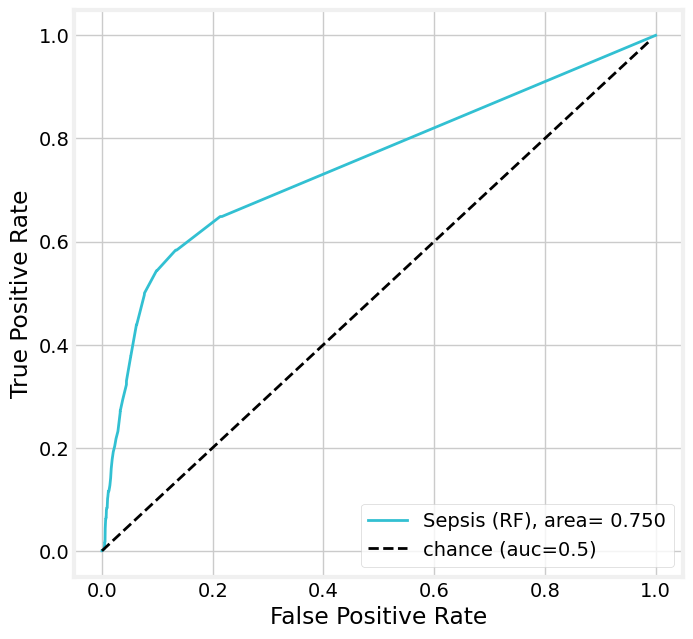

1.0 1.0 0.0
132


C:\Users\ibertr02\AppData\Local\Temp\ipykernel_54668\2629037324.py:72: RuntimeWarning: divide by zero encountered in log
  yprobslog2 = np.log(yprobs2)
C:\Users\ibertr02\AppData\Local\Temp\ipykernel_54668\2629037324.py:89: RuntimeWarning: divide by zero encountered in log
  x =  np.full(shape = len(y), fill_value = np.log(thresholds[idx]))


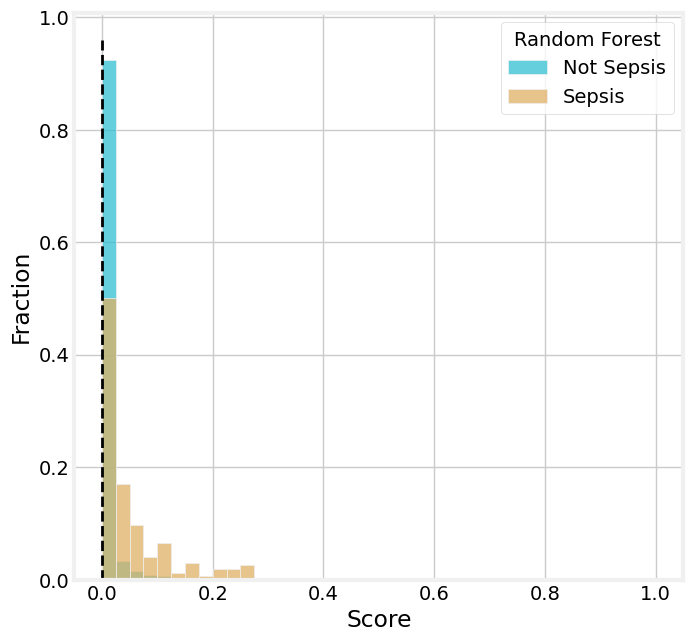

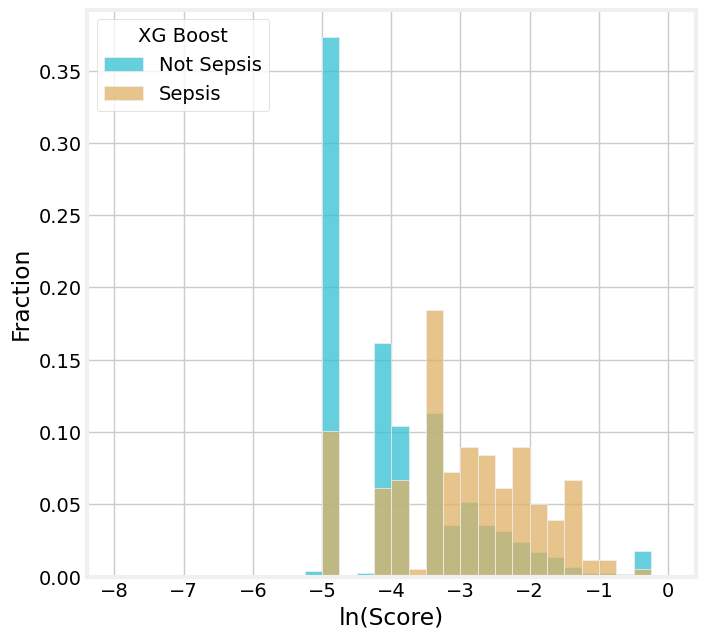

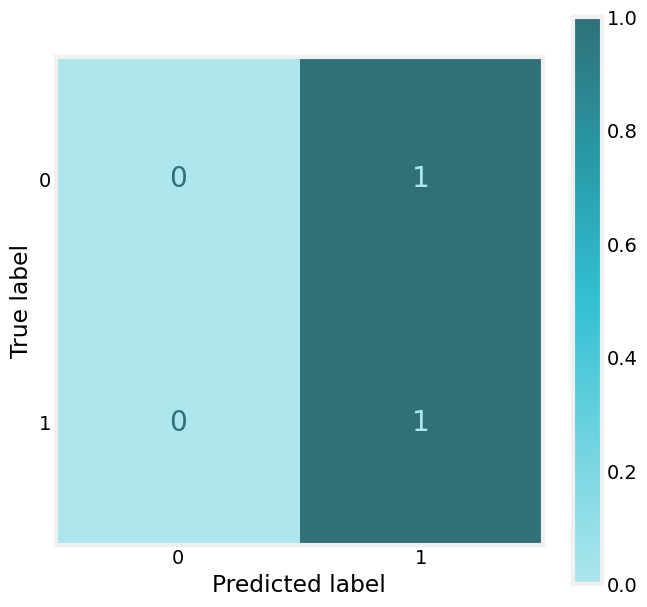

ValueError: Length of values (11) does not match length of index (6)

In [84]:
tmpString =  'Random Forest'
fig, ax = plt.subplots(figsize=(7, 7))

best_model = best_model_RandomForest

y_preds=best_model.predict (X_valid)

y_preds_proba=best_model.predict_proba (X_valid)
# select positive class 
yprobs = np.delete(y_preds_proba,[0],1)
yprobs2 = np.ravel(yprobs,order='c') 

y2=np.ravel(y_valid,order='c')

fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
val,idx = find_nearest(tpr,0.85)
# print(val,tpr[idx],fpr[idx],thresholds[idx])



fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
auc = roc_auc_score(y_valid, yprobs)
plt.plot(fpr,tpr,label="{} (RF), area= {:.3f}".format(Diagnosis,auc))


x = np.arange(0,1,0.01)
plt.plot(x,x,label='chance (auc=0.5)',color='k',linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.savefig("Figures/{}_{}_AUC_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()

import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx

val,idx = find_nearest(tpr,0.85)
print(tpr[idx],fpr[idx],thresholds[idx])
print(len(tpr))

yprobs2 = np.ravel(yprobs,order='c') 

compareResults = pd.DataFrame({DiagnosisString:y2, "Prob":yprobs2})
compareResults.describe()


ResultsFlag0 = compareResults.loc[compareResults[DiagnosisString]==0]
ResultsFlag1 = compareResults.loc[compareResults[DiagnosisString]==1]
fig, ax = plt.subplots(figsize=(7, 7))

sns.histplot(data=ResultsFlag0, x="Prob",  binrange=[0.,1.], binwidth=0.025, stat = 'probability', label='Not {}'.format(Diagnosis))
sns.histplot(data=ResultsFlag1, x="Prob",  binrange=[0.,1.], binwidth=0.025,  stat = 'probability', color= "#E0B165" , label='{}'.format(Diagnosis))
plt.legend(loc=1, title="{}".format(tmpString))

y = np.arange(0.,ax.get_ylim()[1],0.01)
# print(len(y))
x =  np.full(shape = len(y), fill_value = thresholds[idx])

plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
plt.ylabel("Fraction")
plt.xlabel("Score")
plt.savefig("Figures/{}_{}_Score_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")


yprobslog2 = np.log(yprobs2) 

compareResultsLog = pd.DataFrame({'SepsisFlag':y2, "Prob":yprobslog2})
#print(compareResultsLog.describe())


ResultsFlag0_xgb_log = compareResultsLog.loc[compareResultsLog.SepsisFlag==0]
ResultsFlag1_xgb_log = compareResultsLog.loc[compareResultsLog.SepsisFlag==1]
fig, ax = plt.subplots(figsize=(7, 7))

sns.histplot(data=ResultsFlag0_xgb_log, x="Prob",  binrange=[-8,0.], binwidth=0.25, stat = 'probability',label='Not {}'.format(Diagnosis))
sns.histplot(data=ResultsFlag1_xgb_log, x="Prob",  binrange=[-8,0.], binwidth=0.25,  stat = 'probability',  color= "#E0B165" , label='{}'.format(Diagnosis))
plt.legend(loc=2,  title="XG Boost")
plt.ylabel("Fraction")

y = np.arange(0.,ax.get_ylim()[1],0.01)
#print(len(y))
x =  np.full(shape = len(y), fill_value = np.log(thresholds[idx]))

plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
plt.ylabel("Fraction")
plt.xlabel("ln(Score)")


y_preds2 = np.where(yprobs2<thresholds[idx],0,1)

# fig, ax = plt.subplots(figsize=(7, 7))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, y_preds2, normalize='true')
    )
fig, ax = plt.subplots(figsize=(7,7))
cmp.plot(cmap=cmap_blended, ax=ax, text_kw={'fontsize':'x-large'})
ax.grid(False)

plt.savefig("Figures/{}_{}_Confusion_Matrix_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()



# skew_vars=[]
# numeric_features = X_valid.drop(skew_vars, axis=1).select_dtypes(include=['float64', 'int64']).columns #.columns.drop('diagnosis_count')
# categorical_features = X_valid.select_dtypes(include=['category', 'object']).columns
# # print (numeric_features)
# new_cat_cols = best_model['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)
# all_cols = np.concatenate([numeric_features, new_cat_cols])
# print(all_cols)
best_model[1].feature_importances_
feat_importances=pd.Series(best_model[1].feature_importances_ , index=all_cols)
feat_importances=pd.DataFrame(feat_importances).reset_index()

feat_importances.columns=['feature', 'feature_importance']



feat_importances.sort_values('feature_importance', ascending=False, inplace=True)

feat_importances['name'] = None
idx = feat_importances.index


OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
               'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
             'FirstGCSScoreAdult':'Glasgow Coma Scale',
               'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
               'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
               'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':r'O$_{2}$ Saturation (%)',  'Gender_Male':'Sex - Male',
               'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
               'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
               'FirstO2Flow':r'O$_{2}$ Flow '
               }


for i in idx:
    # print(i)

    val = feat_importances.loc[i].feature
    # print(i,val)
    try:
        tmpValue = plotSettings[val][4]
        feat_importances.at[i,'name']= tmpValue[0:tmpValue.rfind(' [')]
    except: 
        for item9 in OtherValues.keys():
            if val == item9:
                feat_importances.at[i,'name'] = OtherValues[item9]
        
        # if val == 'TriageCategory_2':
        #     feat_importances.at[i,'name']= 'Triage Category 2'
        # else:
        #     print(val)
# print(feat_importances)

feat_importances15=feat_importances.head(15)
fig, ax = plt.subplots(figsize=(10, 5))

#plt.figure(figsize=(10,5))
chart=sns.barplot(x='feature', y='feature_importance', data=feat_importances15, 
                    order=feat_importances15.sort_values('feature_importance', ascending=False).feature, ax=ax
) #color='b')

# print(chart.get_xticklabels())
# chart.set_xticklabels(chart.get_xticklabels(),rotation=90, 
#                     horizontalalignment='right',fontweight='light', fontsize='x-large')

chart.set_xticklabels( list(feat_importances15['name'].values),
                      rotation=90, ha="center",
                   fontweight='light', fontsize='x-large')
# plt.title("feature Importance: {a} {b}".format(a=key,  b=str("Stuff")+': having All Dx'))
plt.ylabel("Feature Importance")
chart.set(xlabel=None)

ax.annotate('{}'.format(tmpString), xy=(0.95, 0.95), xycoords='axes fraction',
            fontsize='x-large', ha='right', va='top')
            #size=14, 
            # ha='right', va='top',
            #bbox=dict(boxstyle='round', fc='w'))
plt.savefig("Figures/{}_{}_Feature_Importance.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()
feat_importances_RF = feat_importances.copy()  #.iloc #.head(30)

In [85]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM',
       'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['IndiginousStatus'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=130, random_state=55))])

In [90]:
#  pd.Series(best_model[1].feature_importances_ , index=all_cols)
print(best_model[1].feature_importances_)
print(all_cols)
print(X_train.columns)
# best_model[1].feature_names_in_
# best_model[1].get_booster().feature_names = all_cols
# print(best_model[0].get_booster().feature_names) #    .num_features()
# print(best_model[0].get_booster().num_features())
# print(best_model[0].get_booster().feature_types)
# print(best_model[0].get_booster().attributes())
# print(best_model[0].get_booster().get_fscore())

[2.79136655e-01 2.96938390e-02 1.97048709e-01 1.32408883e-01
 1.09396004e-01 2.37612546e-01 7.56724878e-04 1.02245505e-02
 3.65858455e-03 6.32740596e-05 2.30238083e-07]
['FirstBPSystolic' 'FirstLevelofConsciousness' 'FirstPulseRateBPM'
 'FirstRespiration' 'FirstSpO2' 'FirstTemperatureDegreesC']
Index(['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM',
       'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC',
       'IndiginousStatus'],
      dtype='object')


AttributeError: 'ColumnTransformer' object has no attribute 'get_booster'

In [28]:
feat_importances_RF #.head()

NameError: name 'feat_importances_RF' is not defined

## XG Boost Results

0.855072463768116 0.855072463768116 0.40093298871587973 0.0059395432


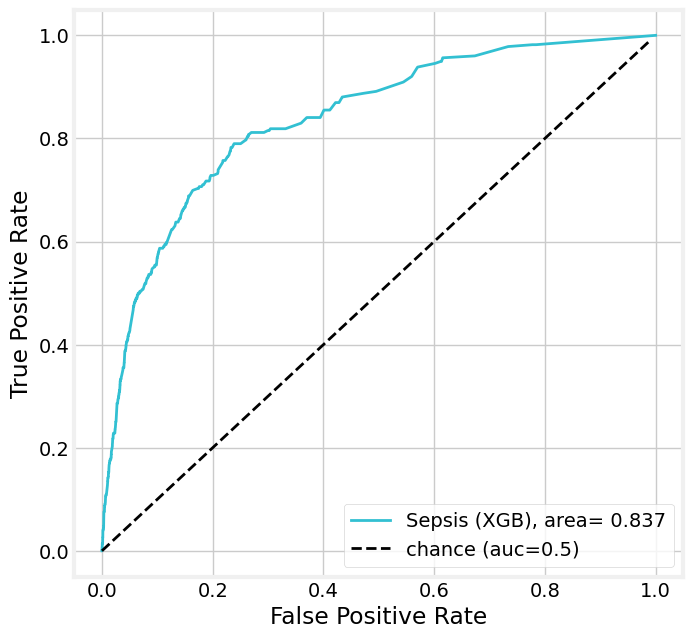

0.855072463768116 0.40093298871587973 0.0059395432
709


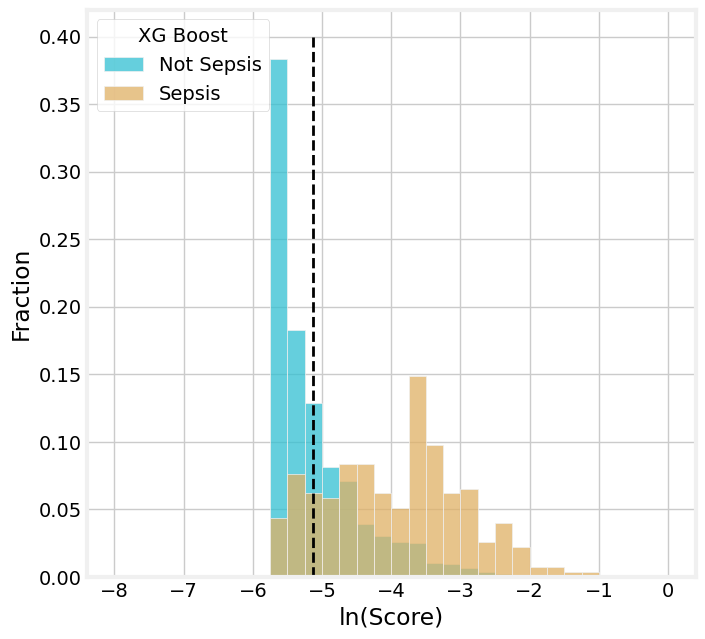

<Figure size 640x480 with 0 Axes>

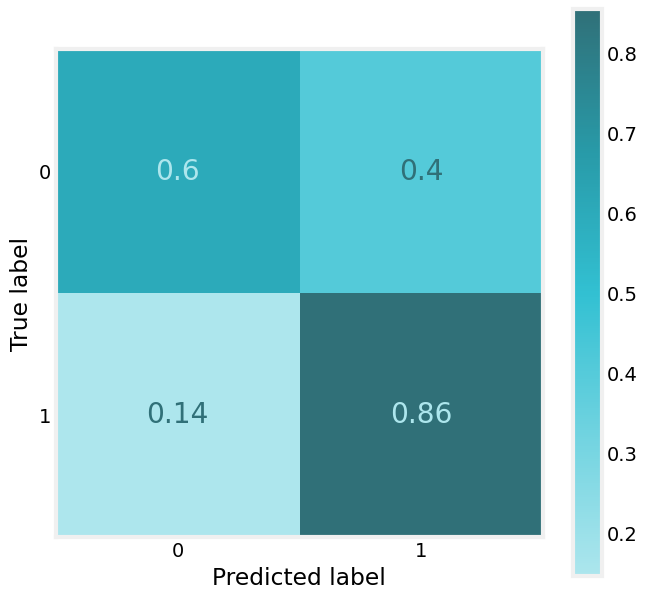

ValueError: Length of values (11) does not match length of index (6)

In [29]:
tmpString =  'XG Boost'
fig, ax = plt.subplots(figsize=(7, 7))

best_model = best_model_XGBoost

y_preds=best_model.predict (X_valid)

y_preds_proba=best_model.predict_proba (X_valid)
# select positive class 
yprobs = np.delete(y_preds_proba,[0],1)
yprobs2 = np.ravel(yprobs,order='c') 

y2=np.ravel(y_valid,order='c')

fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
val,idx = find_nearest(tpr,0.85)
print(val,tpr[idx],fpr[idx],thresholds[idx])



fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
auc = roc_auc_score(y_valid, yprobs)
plt.plot(fpr,tpr,label="{} (XGB), area= {:.3f}".format(Diagnosis,auc))


x = np.arange(0,1,0.01)
plt.plot(x,x,label='chance (auc=0.5)',color='k',linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.savefig("Figures/{}_{}_AUC_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()

import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx

val,idx = find_nearest(tpr,0.85)
print(tpr[idx],fpr[idx],thresholds[idx])
print(len(tpr))

yprobs2 = np.ravel(yprobs,order='c') 

compareResults = pd.DataFrame({DiagnosisString:y2, "Prob":yprobs2})
compareResults.describe()


ResultsFlag0 = compareResults.loc[compareResults[DiagnosisString]==0]
ResultsFlag1 = compareResults.loc[compareResults[DiagnosisString]==1]

# sns.histplot(data=ResultsFlag0, x="Prob",  binrange=[0.,1.], binwidth=0.025, stat = 'probability', label='Not {}'.format(Diagnosis))
# sns.histplot(data=ResultsFlag1, x="Prob",  binrange=[0.,1.], binwidth=0.025,  stat = 'probability', color= "#E0B165" , label='{}'.format(Diagnosis))
# plt.legend(loc=1, title="{}".format(tmpString))

# y = np.arange(0.,0.2,0.01)
# print(len(y))
# x =  np.full(shape = len(y), fill_value = thresholds[idx])

# plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
# plt.ylabel("Fraction")
# plt.xlabel("Score")

# plt.show()



yprobslog2 = np.log(yprobs2) 

compareResultsLog = pd.DataFrame({'SepsisFlag':y2, "Prob":yprobslog2})
#print(compareResultsLog.describe())


ResultsFlag0_xgb_log = compareResultsLog.loc[compareResultsLog.SepsisFlag==0]
ResultsFlag1_xgb_log = compareResultsLog.loc[compareResultsLog.SepsisFlag==1]
fig, ax = plt.subplots(figsize=(7, 7))

sns.histplot(data=ResultsFlag0_xgb_log, x="Prob",  binrange=[-8,0.], binwidth=0.25, stat = 'probability',label='Not {}'.format(Diagnosis))
sns.histplot(data=ResultsFlag1_xgb_log, x="Prob",  binrange=[-8,0.], binwidth=0.25,  stat = 'probability',  color= "#E0B165" , label='{}'.format(Diagnosis))
plt.legend(loc=2,  title="XG Boost")
plt.ylabel("Fraction")

y = np.arange(0.,ax.get_ylim()[1],0.01)
#print(len(y))
x =  np.full(shape = len(y), fill_value = np.log(thresholds[idx]))

plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
plt.ylabel("Fraction")
plt.xlabel("ln(Score)")
plt.savefig("Figures/{}_{}_Score_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()

plt.clf()


y_preds2 = np.where(yprobs2<thresholds[idx],0,1)

# fig, ax = plt.subplots(figsize=(8, 6))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, y_preds2, normalize='true')
    )
#fig, ax = plt.subplots(figsize=(10,10))
fig, ax = plt.subplots(figsize=(7,7))
cmp.plot(cmap=cmap_blended, ax=ax, text_kw={'fontsize':'x-large'})
ax.grid(False)
# plt.xticks(rotation = 45)


# plt.xticks(rotation = 45)
plt.savefig("Figures/{}_{}_Confusion_Matrix_Plot.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")

plt.show()




# skew_vars=[]
# numeric_features = X_valid.drop(skew_vars, axis=1).select_dtypes(include=['float64', 'int64']).columns #.columns.drop('diagnosis_count')
# categorical_features = X_valid.select_dtypes(include=['category', 'object']).columns
# # print (numeric_features)
# new_cat_cols = best_model['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)
# all_cols = np.concatenate([numeric_features, new_cat_cols])
# print(all_cols)
best_model[1].feature_importances_
feat_importances=pd.Series(best_model[1].feature_importances_ , index=all_cols)
feat_importances=pd.DataFrame(feat_importances).reset_index()

feat_importances.columns=['feature', 'feature_importance']



feat_importances.sort_values('feature_importance', ascending=False, inplace=True)
# feat_importances=feat_importances.head(15)

feat_importances['name'] = None
idx = feat_importances.index
for i in idx:
    # print(i)

    val = feat_importances.loc[i].feature
    # print(i,val)
    try:
        tmpValue = plotSettings[val][4]
        feat_importances.at[i,'name']= tmpValue[0:tmpValue.rfind(' [')]
    except: 
        for item9 in OtherValues.keys():
            if val == item9:
                feat_importances.at[i,'name'] = OtherValues[item9]
# print(feat_importances)

feat_importances15=feat_importances.head(15)

plt.figure(figsize=(10,5))
chart=sns.barplot(x='feature', y='feature_importance', data=feat_importances15, 
                    order=feat_importances15.sort_values('feature_importance', ascending=False).feature) #color='b')


chart.set_xticklabels( list(feat_importances15['name'].values),
                      rotation=90, ha="center",
                   fontweight='light', fontsize='x-large')
# plt.title("feature Importance: {a} {b}".format(a=key,  b=str("Stuff")+': having All Dx'))
plt.ylabel("Feature Importance")
chart.set(xlabel=None)
ax.annotate('{}'.format(tmpString), xy=(0.95, 0.95), xycoords='axes fraction',
            fontsize='x-large', ha='right', va='top')
plt.savefig("Figures/{}_{}_Feature_Importance.png".format(DiagnosisString,tmpString), dpi=300, bbox_inches = "tight")
plt.show()
feat_importances_XGB = feat_importances.copy()  #.iloc #.head(30)

In [75]:
#  pd.Series(best_model[1].feature_importances_ , index=all_cols)
# print(best_model[1].feature_importances_)
print(all_cols)
print(X_train.columns)
# best_model[1].feature_names_in_
best_model[1].get_booster().feature_names = all_cols
print(best_model[1].get_booster().feature_names) #    .num_features()
print(best_model[1].get_booster().num_features())
print(best_model[1].get_booster().feature_types)
print(best_model[1].get_booster().attributes())
print(best_model[1].get_booster().get_fscore())

['FirstBPSystolic' 'FirstLevelofConsciousness' 'FirstPulseRateBPM'
 'FirstRespiration' 'FirstSpO2' 'FirstTemperatureDegreesC']
Index(['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM',
       'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC',
       'IndiginousStatus'],
      dtype='object')


AssertionError: 

In [67]:
t_df = best_model[1].get_booster().trees_to_dataframe()

In [71]:
pd.set_option('display.max_rows',None)

t_df.Feature.unique()

array(['f0', 'Leaf', 'f5', 'f4', 'f3', 'f1'], dtype=object)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

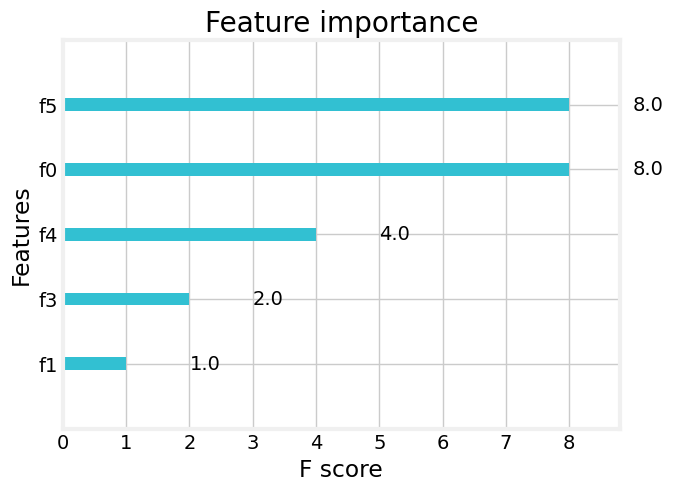

In [45]:
xgb.plot_importance(best_model[1])

In [30]:
Data_Storage_File = 'Results/{}_{}_FeatureImportances_Pathway_ED.pkl'.format(DataSet,DiagnosisString)
print(Data_Storage_File)

with open(Data_Storage_File, 'wb') as file:  
    pickle.dump((feat_importances_RF,feat_importances_XGB), file)
    
# from openpyxl import load_workbook
Data_Storage_File = 'Results/_{}_{}_FeatureImportances_Pathway_ED.xlsx'.format(DataSet,DiagnosisString)

with pd.ExcelWriter(Data_Storage_File, engine='openpyxl') as writer: 
    feat_importances_RF.to_excel(writer,sheet_name='RandomForest') 
    feat_importances_XGB.to_excel(writer,sheet_name='XGBoost') 

Results/DataSet30_SepsisFlag_FeatureImportances_Pathway_ED.pkl


NameError: name 'feat_importances_RF' is not defined

In [ ]:
trialsXGBoost.trials[0]

In [ ]:
xgbValues = []
varStrings = ["falsePositive", "accuracy", "precision", "recall","precision","f1", "auc"]
scores = {}
i=0
for i in range(100):
    scores = {}
    # if i < 2:
    scores['max_depth'] = trialsRandomForest.trials[i]['misc']['vals']['max_depth'][0]+1
    scores['n_estimators'] = trialsRandomForest.trials[i]['misc']['vals']['n_estimators'][0]+1

        # 
        # 'n_estimators'
    for c in varStrings:
        # print(c)
        key = "ATTACH::{}::{}".format(i,c)
        scores[c] = trialsRandomForest.attachments[key]
        scores["i"] = i
    xgbValues.append(scores)
# print (scores)
    

In [ ]:
trails_XGB_df = pd.DataFrame.from_dict(xgbValues)

In [ ]:
trails_XGB_df.head()

In [ ]:
trails_XGB_df.recall.idxmax()

In [ ]:
trails_XGB_df.falsePositive.idxmin()

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
g = sns.scatterplot(data=trails_XGB_df, x='n_estimators', y='falsePositive',  alpha=.75, palette="muted", label='False Positive Rate')
g = sns.scatterplot(data=trails_XGB_df, x='n_estimators', y='accuracy',  alpha=.75, palette="muted", label='Accuracy')
g = sns.scatterplot(data=trails_XGB_df, x='n_estimators', y='recall',  alpha=.75, palette="muted", label='Recall')
g = sns.scatterplot(data=trails_XGB_df, x='n_estimators', y='precision',  alpha=.75, palette="muted", label='Precision')
g = sns.scatterplot(data=trails_XGB_df, x='n_estimators', y='f1',  alpha=.75, palette="muted", label='F1')





In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
g = sns.scatterplot(data=trails_XGB_df, x='max_depth', y='falsePositive',  alpha=.75, palette="muted", label='False Positive Rate')
g = sns.scatterplot(data=trails_XGB_df, x='max_depth', y='accuracy',  alpha=.75, palette="muted", label='Accuracy')
g = sns.scatterplot(data=trails_XGB_df, x='max_depth', y='recall',  alpha=.75, palette="muted", label='Recall')
g = sns.scatterplot(data=trails_XGB_df, x='max_depth', y='precision',  alpha=.75, palette="muted", label='Precision')
g = sns.scatterplot(data=trails_XGB_df, x='max_depth', y='f1',  alpha=.75, palette="muted", label='F1')